# <center>EDA & Visualization</center>

We have cleaned the dataset in the previous phase and from here on we work upon the cleaned .csv file.

---

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rc('font', size=15) #increasing the plot font size throughout
# %config InlineBackend.figure_format = 'svg' #improving the plot graphic quality; enable to get svg format plots
# though within some plots we have used plt.figure(dpi=xxx) method to incrment plot quality

## Loading the clean dataset

In [3]:
df = pd.read_csv("cleaned_playstore_apps.csv")

---

## Gathering the basic idea about dataset

In [4]:
df.describe()

,Rating,Reviews,Size,Installs+,Price($)
count,8196.000000,9.659000e+03,9659.000000,9.659000e+03,9659.000000
mean,4.173267,2.168041e+05,17.677624,7.798170e+06,1.097231
std,0.536253,1.831430e+06,21.604017,5.376973e+07,16.851618
min,1.000000,0.000000e+00,-1.000000,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,2.900000,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,9.100000,1.000000e+05,0.000000
75%,4.500000,2.945350e+04,25.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


- **Inference:**
    - The average size of apps in playstore are ~17.6MB, of course we do have many outliers and apps whose size varies with device.
    - The mean rating given by the users is ~4.1 Stars, which is certainly good news for the app developers.
    - The mean price we see is ~ \\$1.1, though we even see maximum of \\$400. We can infer that the data is largely skewed towards Max price.

Note that the "min" value of Size is '-1.00', this is not error but '-1.00' stands for 'Varies with device'.

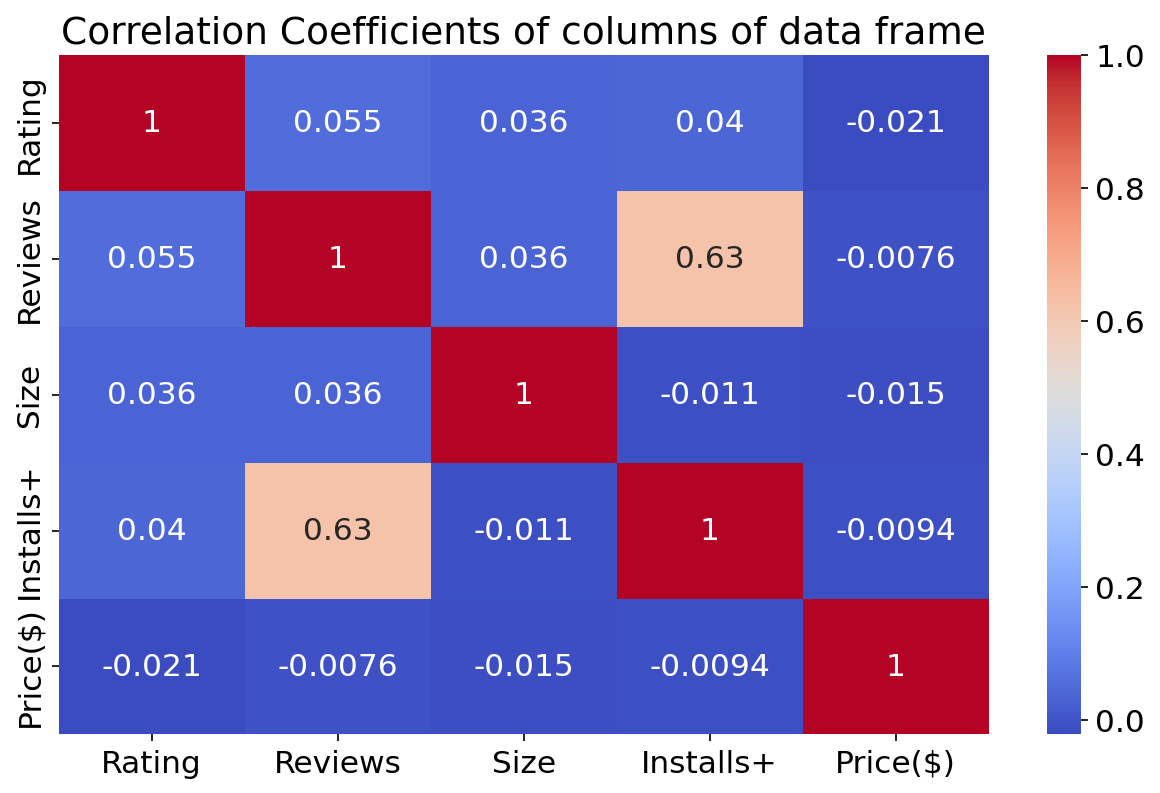

In [20]:
plt.figure(figsize=(10,6), dpi=150)
sns.heatmap(df.corr(), annot=True,cmap="coolwarm")
plt.title("Correlation Coefficients of columns of data frame")
plt.show()

- **Inference:**
  - From the correlation matrix we can see that there isnt any significant correlation between any of the columns. Though we do see  considerable positive correlation between Reviews and Installs.

## Distribution of apps size in Playstore.

Text(0.5, 0, 'Size in MB')

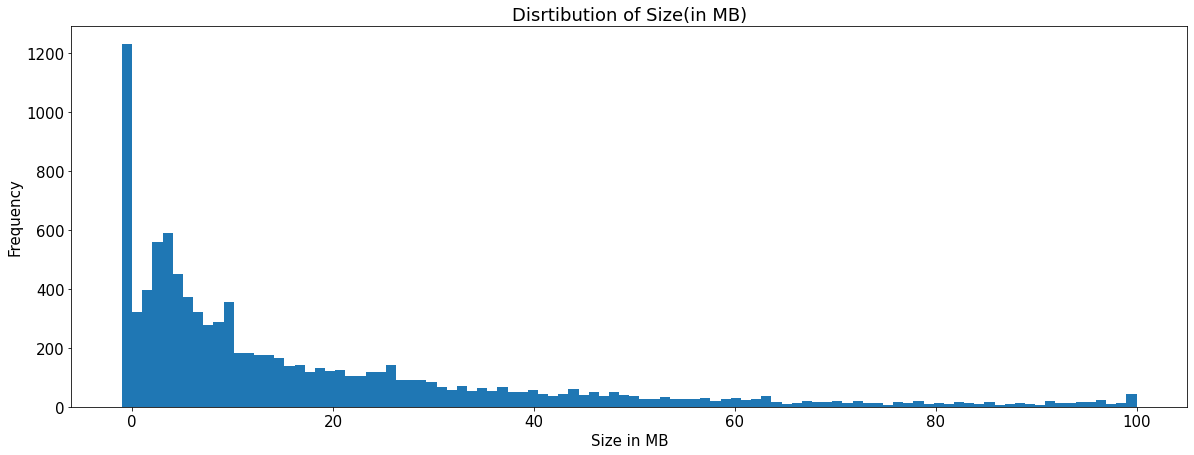

In [6]:
df.Size.plot.hist(bins=100, title='Disrtibution of Size(in MB)', figsize=(20,7)).set_xticks(np.linspace(0,100,6))
plt.xlabel('Size in MB')

- **Inference:**
    - From the above histogram plot we can see that there are far more apps whose sizes varies with device than any other size groups.
    - Even if the 'Varies with device' group of apps for Size are removed, we can still see that the graph will be greatly right skewed.

In [7]:
#checking exactly how many Size 'Varies with device' apps are there
df[ df.Size==-1].shape

(1228, 13)

In [8]:
# We check and see few of them
df[ df.Size==-1].head()

,App,Category,Rating,Reviews,Size,Installs+,Type,Price($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
25,20 Minuten (CH),NEWS_AND_MAGAZINES,3.5,14153,-1.0,1000000,Free,0.0,Everyone 10+,News & Magazines,2018-08-03,Varies with device,Varies with device
26,20 minutes (CH),NEWS_AND_MAGAZINES,3.7,4379,-1.0,1000000,Free,0.0,Teen,News & Magazines,2018-08-03,Varies with device,Varies with device
30,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,-1.0,10000000,Free,0.0,Everyone,Personalization,2018-05-22,Varies with device,4.1 and up
45,2GIS: directory & navigator,TRAVEL_AND_LOCAL,4.5,768833,-1.0,50000000,Free,0.0,Everyone,Travel & Local,2018-07-30,Varies with device,Varies with device
50,30 Day Ab Challenge FREE,HEALTH_AND_FITNESS,4.3,48253,-1.0,1000000,Free,0.0,Everyone,Health & Fitness,2017-12-13,Varies with device,Varies with device


## Checking which Category has most apps in Playstore

<AxesSubplot:title={'center':'Percentage of Apps in Playstore from each category.'}, ylabel='Category'>

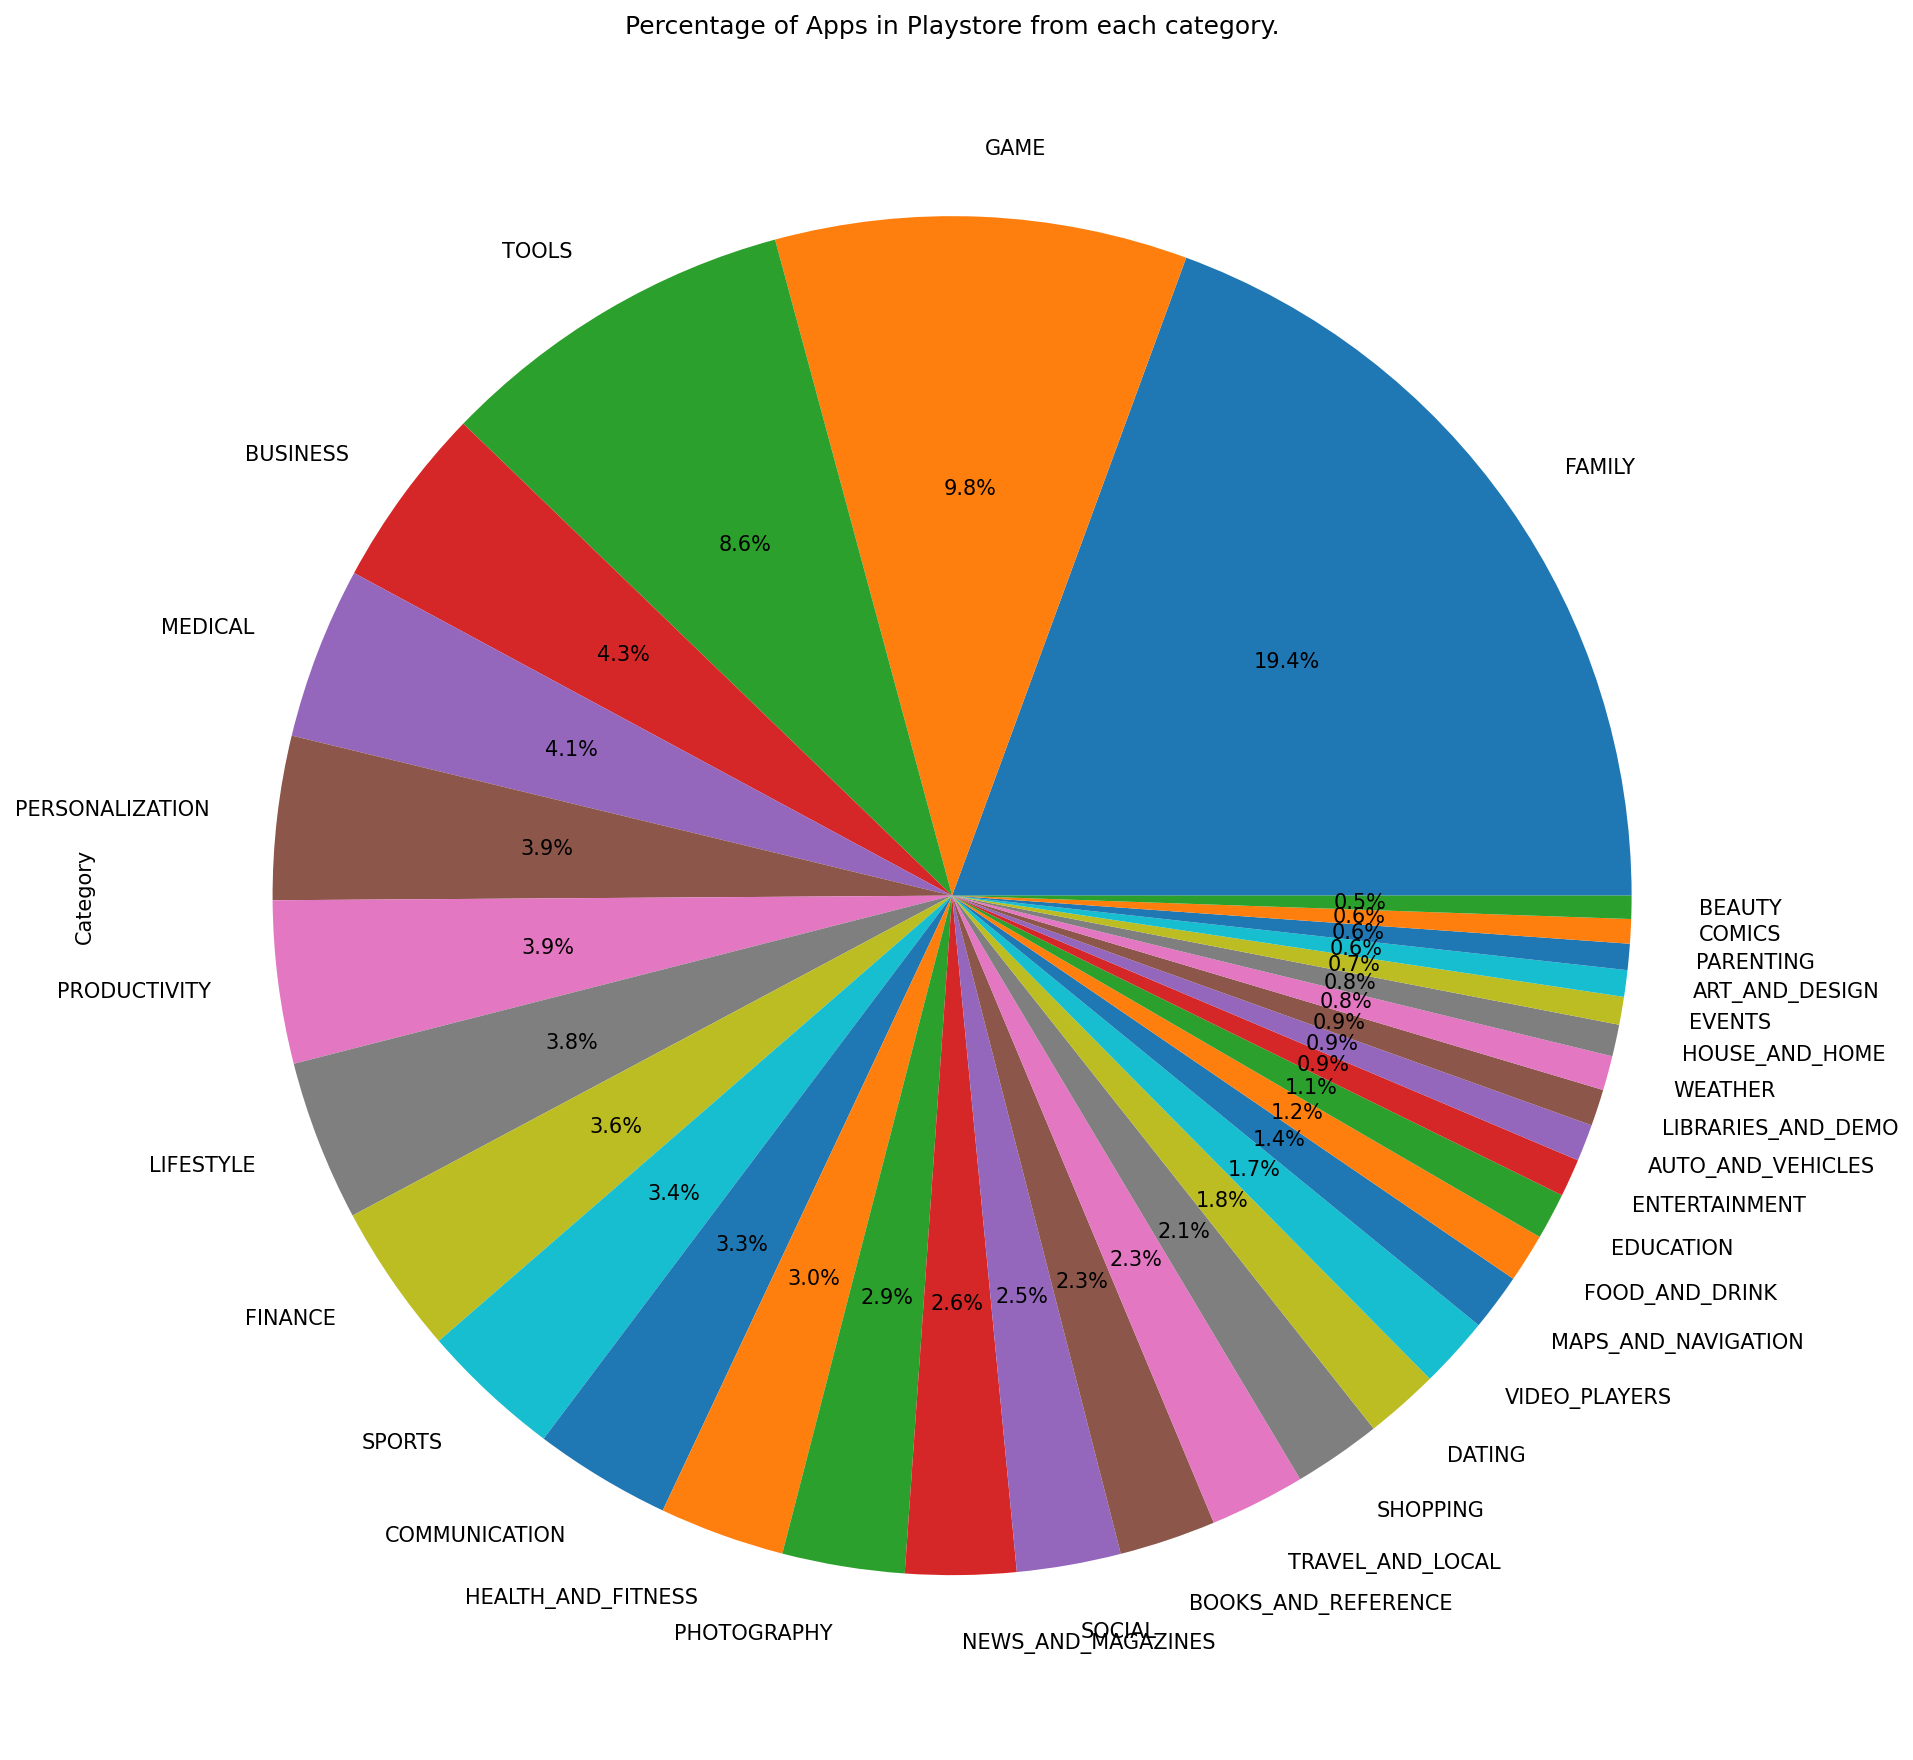

In [9]:
app_counts = df.Category.value_counts()
plt.rc('font',size=10)
plt.figure(dpi=150)
app_counts.plot.pie(title='Percentage of Apps in Playstore from each category.',figsize=(15,15), autopct='%1.1f%%')

- **Inference:**
    - Thus Family has the most number of apps in playstore followed by Game and Tools.
    - There are more than twice Family apps in playstore compared to Game category.

## Checking for the most installed Categories

Now we would like to know if more apps in a category means more download?

<AxesSubplot:title={'center':'Top 15 most installed categories in Playstore.'}, ylabel='Installs+'>

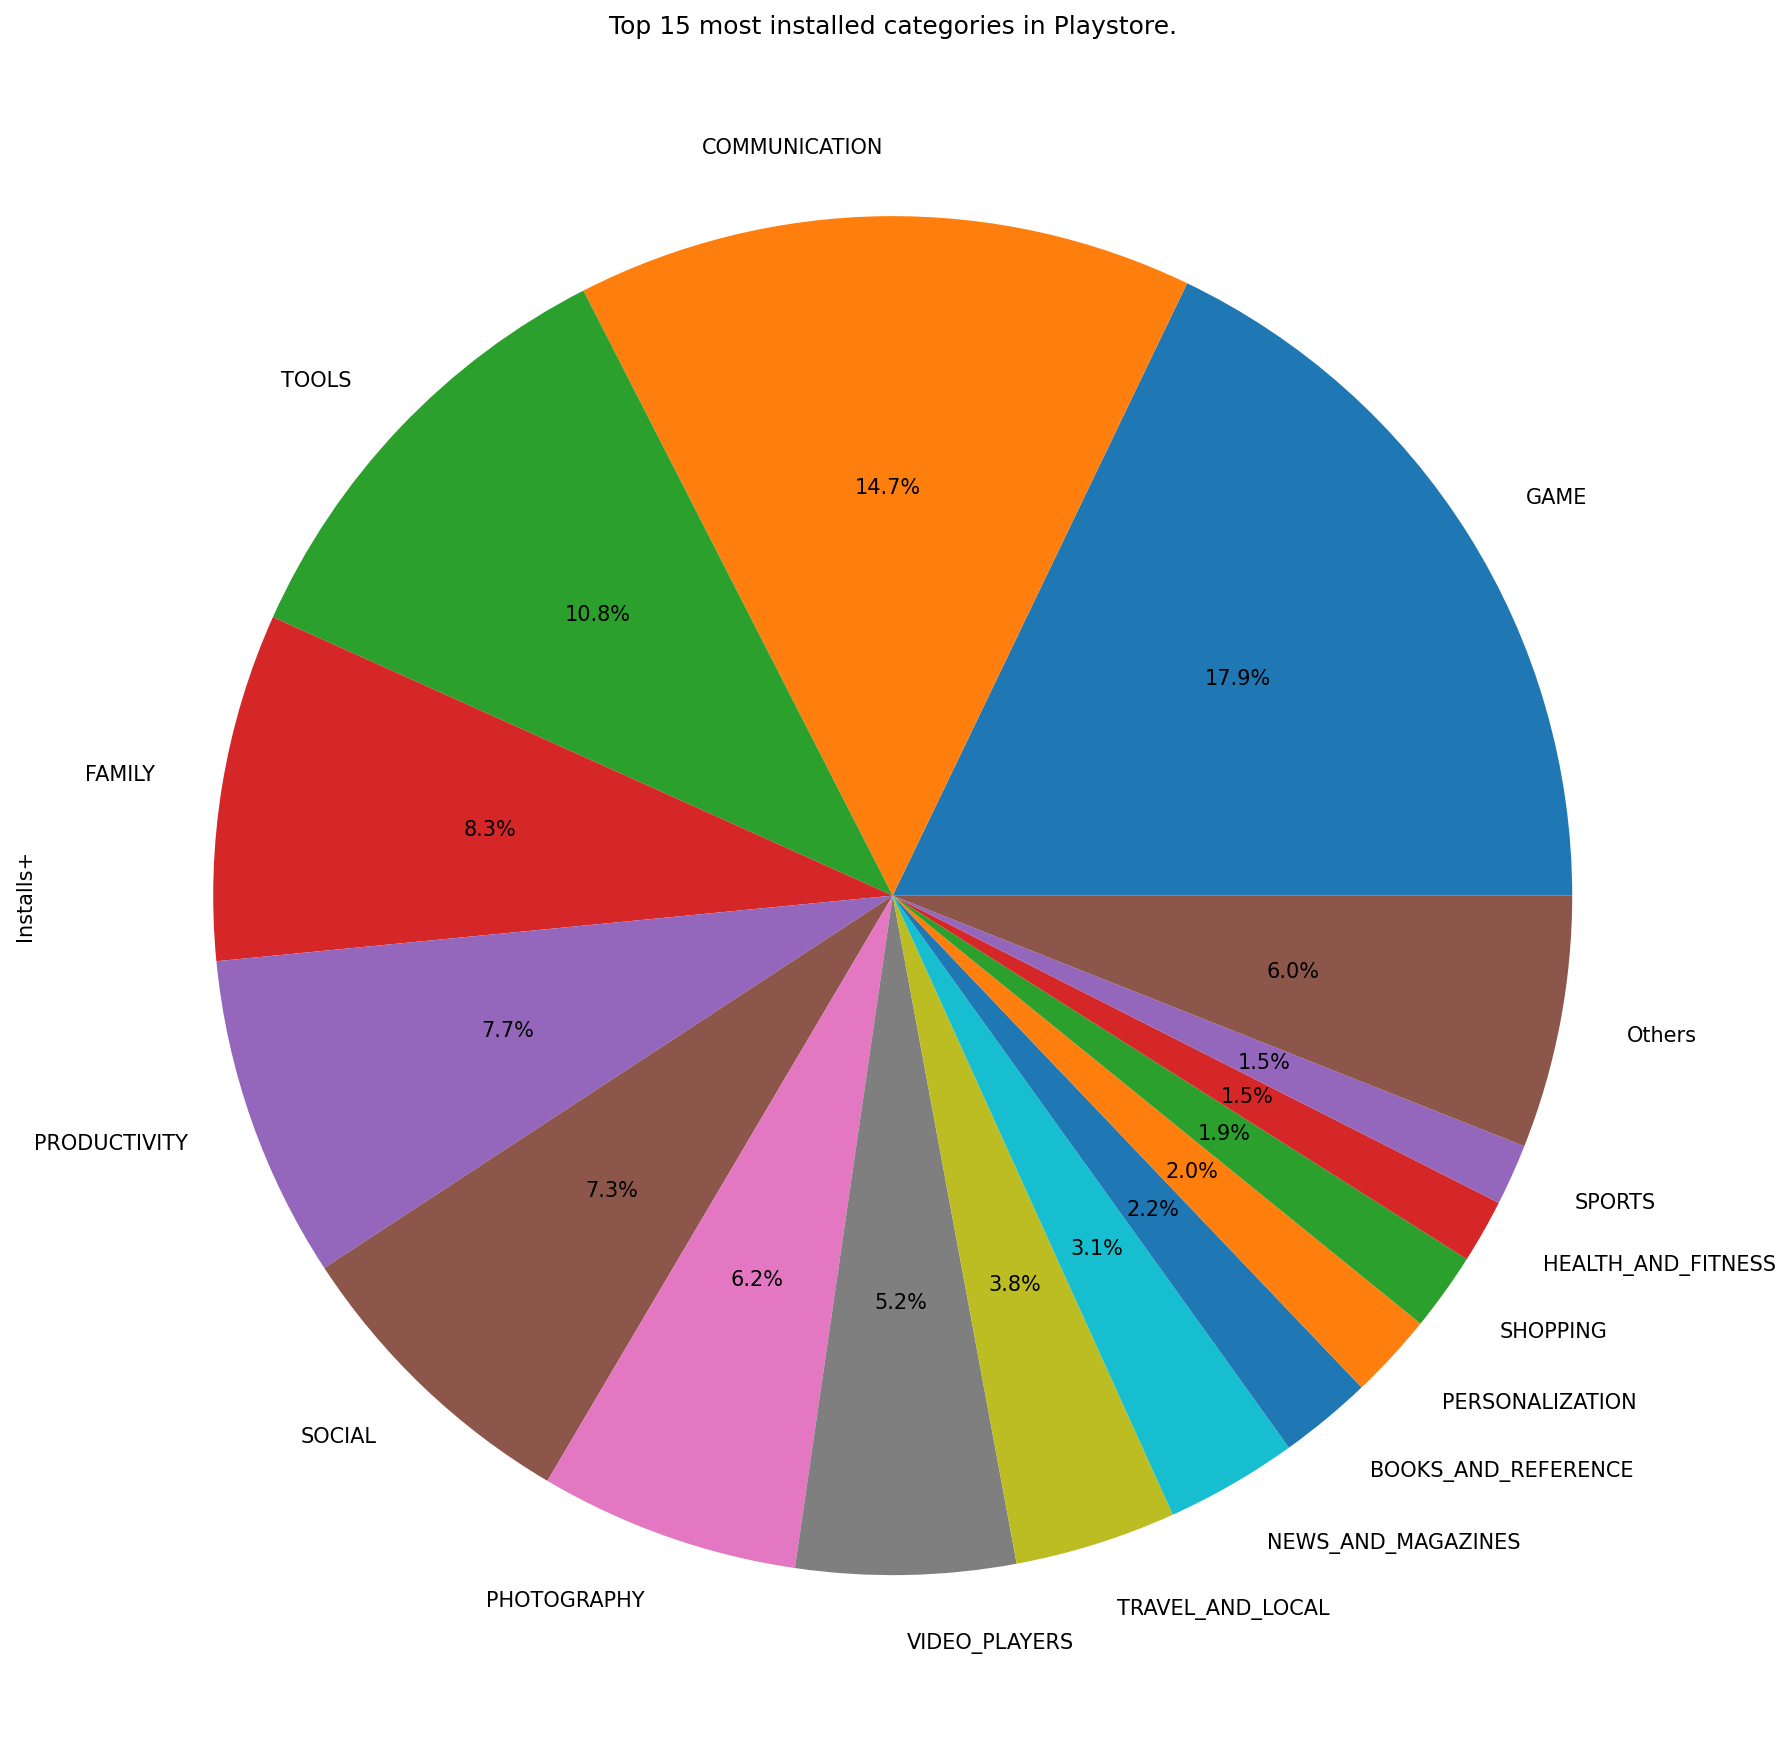

In [10]:
app_category = df.groupby(df.Category).sum()
app_category.sort_values('Installs+', ascending=False, inplace=True)
installs_top = app_category['Installs+'][:15]
installs_top.loc['Others'] = ( app_category['Installs+'][15:].sum())
plt.figure(dpi=150)
installs_top.plot.pie(title='Top 15 most installed categories in Playstore.',figsize=(15,15), autopct='%1.1f%%')

- **Inference:**
    - The most downloaded apps belongs to game category followed by communications.
    - We note that Communication category makes just 3.3% of toal apps in playstore, yet it has installation of 14.7% second just to games. And also that the category Family which had the most apps ranks 4th in number of installs.
    - The installations of Game category is more than twice than that of Family category, even though Family category has more than twice apps than Game category.

## Most installed apps

After this it would be natural to want to see the top downloaded apps from playstore.

<AxesSubplot:title={'center':'Top 30 installed apps in Playstore'}, xlabel='App', ylabel='Count of installs'>

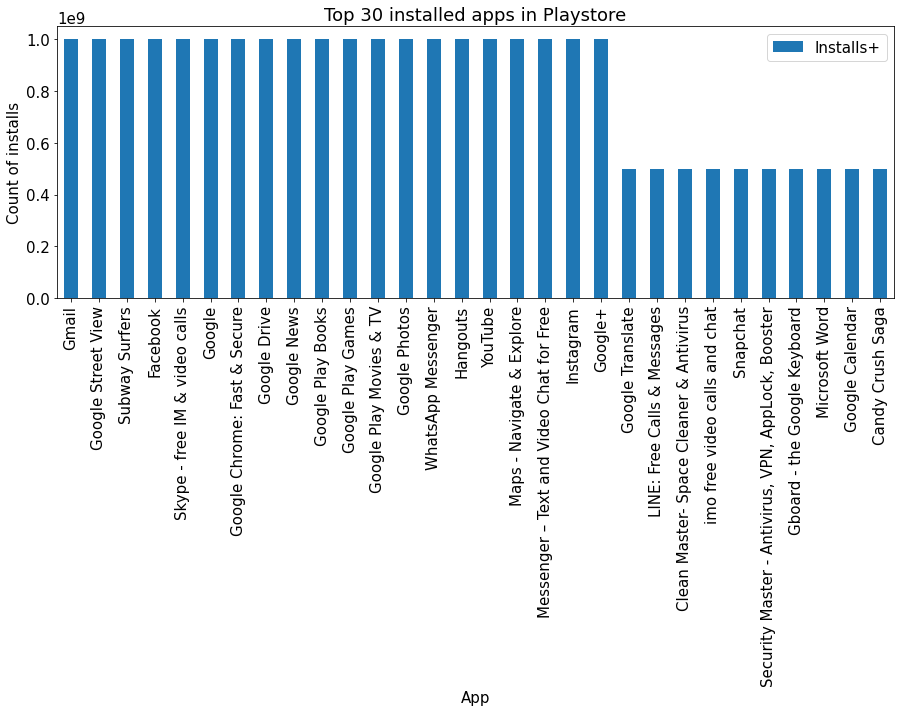

In [11]:
top_downloaded_apps =  df.sort_values('Installs+', ascending=False)
plt.rc('font', size=15)
top_downloaded_apps[:30].plot.bar(x='App',y='Installs+',title='Top 30 installed apps in Playstore' ,figsize=(15,5), ylabel="Count of installs")


- **Inference:**
  - From above chart we see that most of the top downloaded apps are google and facebook products. It is a thing to consider whether this is because this apps comes preinstalled in most of the android devices.

## Visualizing the Ratings of overall apps in playstore using box plot

<AxesSubplot:title={'center':'Visualizing the Ratings in playstore'}, xlabel='Rating'>

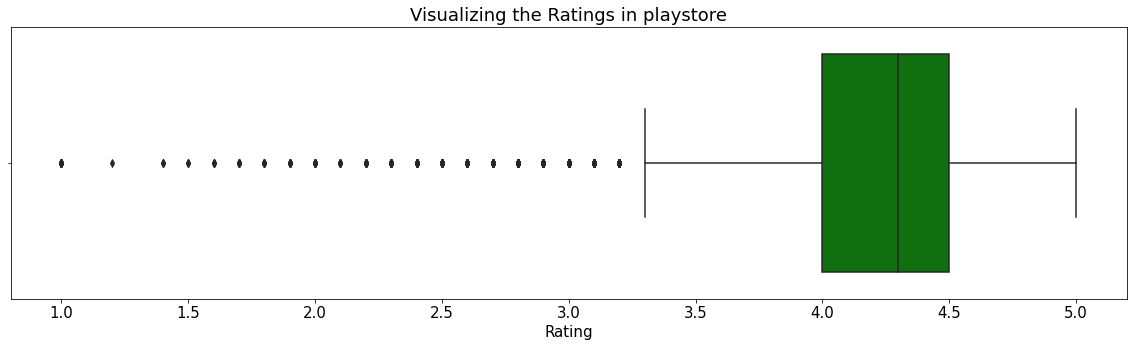

In [12]:
plt.figure(figsize=(20,5))
plt.title("Visualizing the Ratings in playstore")
sns.boxplot(x=df['Rating'],color='green')

- **Inference:**
    - Thus the ratings are concentrated around 4.3 approximately.
    - There lies great many outliers on the left side.

## Visualizing proportion of Free and Paid apps in playstore

<AxesSubplot:title={'center':'Percentage of free and paid apps in Playstore.'}, ylabel='Type'>

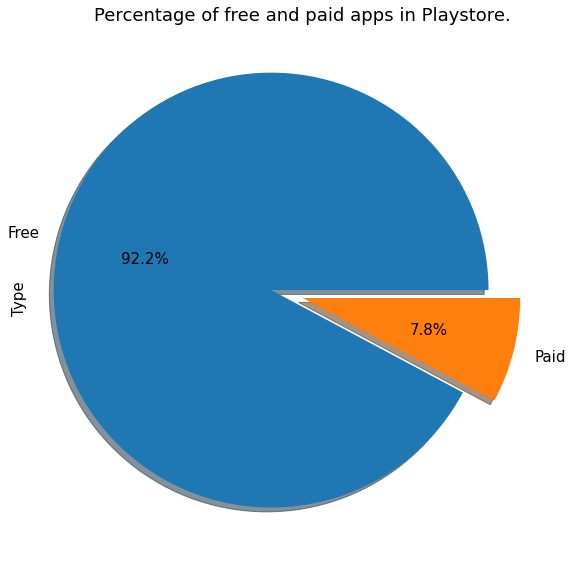

In [13]:
FreePaidPer = df.Type.value_counts()
FreePaidPer.plot.pie( figsize=(10,10), autopct='%1.1f%%', shadow=True,explode=(0.15,0), title="Percentage of free and paid apps in Playstore.")

- **Inference:**
    - Thus we can see that free apps are dominant in playstore.

## Free and Paid apps in each categories

Here we wish to see how much of apps in each category is dominated by paid apps and free apps.

Text(0, 0.5, 'Frequency')

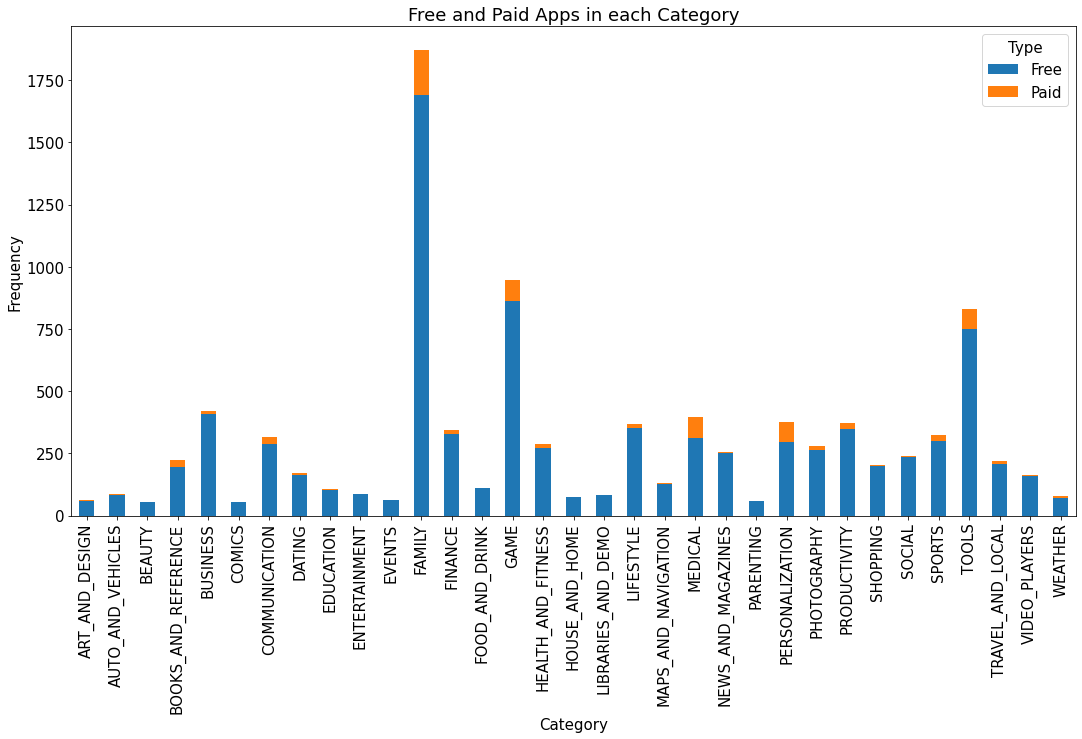

In [14]:
freeVpaid = df.groupby(['Category', 'Type'])[['App']].count().reset_index().rename(columns={'App':'Count'})
freeVpaid = freeVpaid.pivot('Category', 'Type', 'Count').fillna(0).reset_index()
freeVpaid.set_index('Category').plot(kind='bar', stacked=True, figsize=(18,9), title='Free and Paid Apps in each Category')
plt.ylabel('Frequency')

- **Inference:**
  - The market is highly dominated by free apps.
  - Thus the major categories where we see comparatively more paid apps are - family, game, medical, personalization and tools.

## Installation of Free and Paid apps in each category

Now we really get curious whether people really do install paid apps or not. As the number of downloads are very large and has large variation we see  installation count in log scale.

<AxesSubplot:title={'center':'Installation of Free and Paid apps in each category'}, xlabel='Category', ylabel='log scale installation count'>

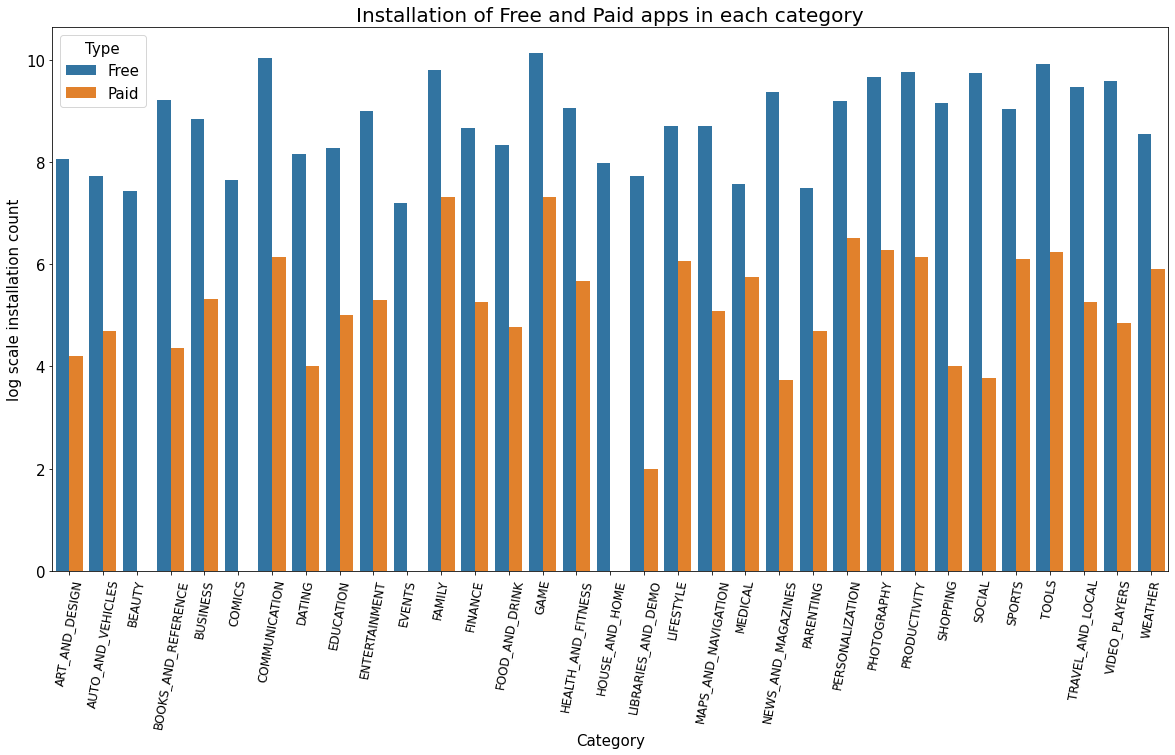

In [15]:
install_by_categor = df.groupby(['Category', 'Type'])[['Installs+']].sum().reset_index()
#looking in log scale
install_by_categor['log scale installation count'] = np.log10( install_by_categor['Installs+'])
plt.figure(figsize=(20,10))
plt.xticks(rotation=80, fontsize=12)
plt.title('Installation of Free and Paid apps in each category', fontsize=20)
sns.barplot(x='Category', y='log scale installation count', hue='Type', data=install_by_categor)

- **Inference:**
  - From above chart we see that the number of downloads is still high for free apps. We should not get illusioned by the figure and remember that the installation count is in log scale.

## Content Rating Types found in playstore

We want to see which category of "Content Rating Types" is found more in playstore. This will also give us idea about the quantity of Apps for each category.

<AxesSubplot:title={'center':'Content Rating Types for Apps in Playstore.'}, xlabel='Content Rating Types', ylabel='Frequency'>

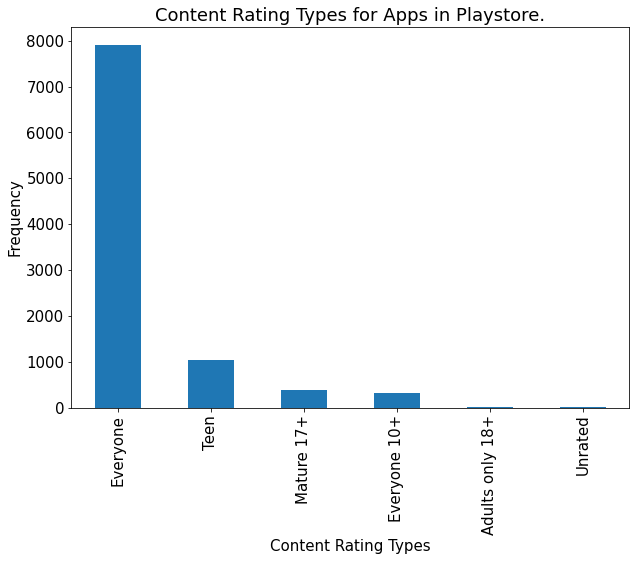

In [16]:
content_rating_types = df['Content Rating'].value_counts()
plt.ylabel('Frequency')
plt.xlabel('Content Rating Types')
content_rating_types.plot.bar(figsize=(10,7), title='Content Rating Types for Apps in Playstore.')

- **Inference:**
    - Therefore we see that most apps are targeted towards everyone or towards people of all age.

## Distribution of apps ratings on playstore

We are trying to see whether the ratings given by the userbase is favored for developers or not. The closer it is to 5, the better it is.

Mean Rating =  4.173267447535383


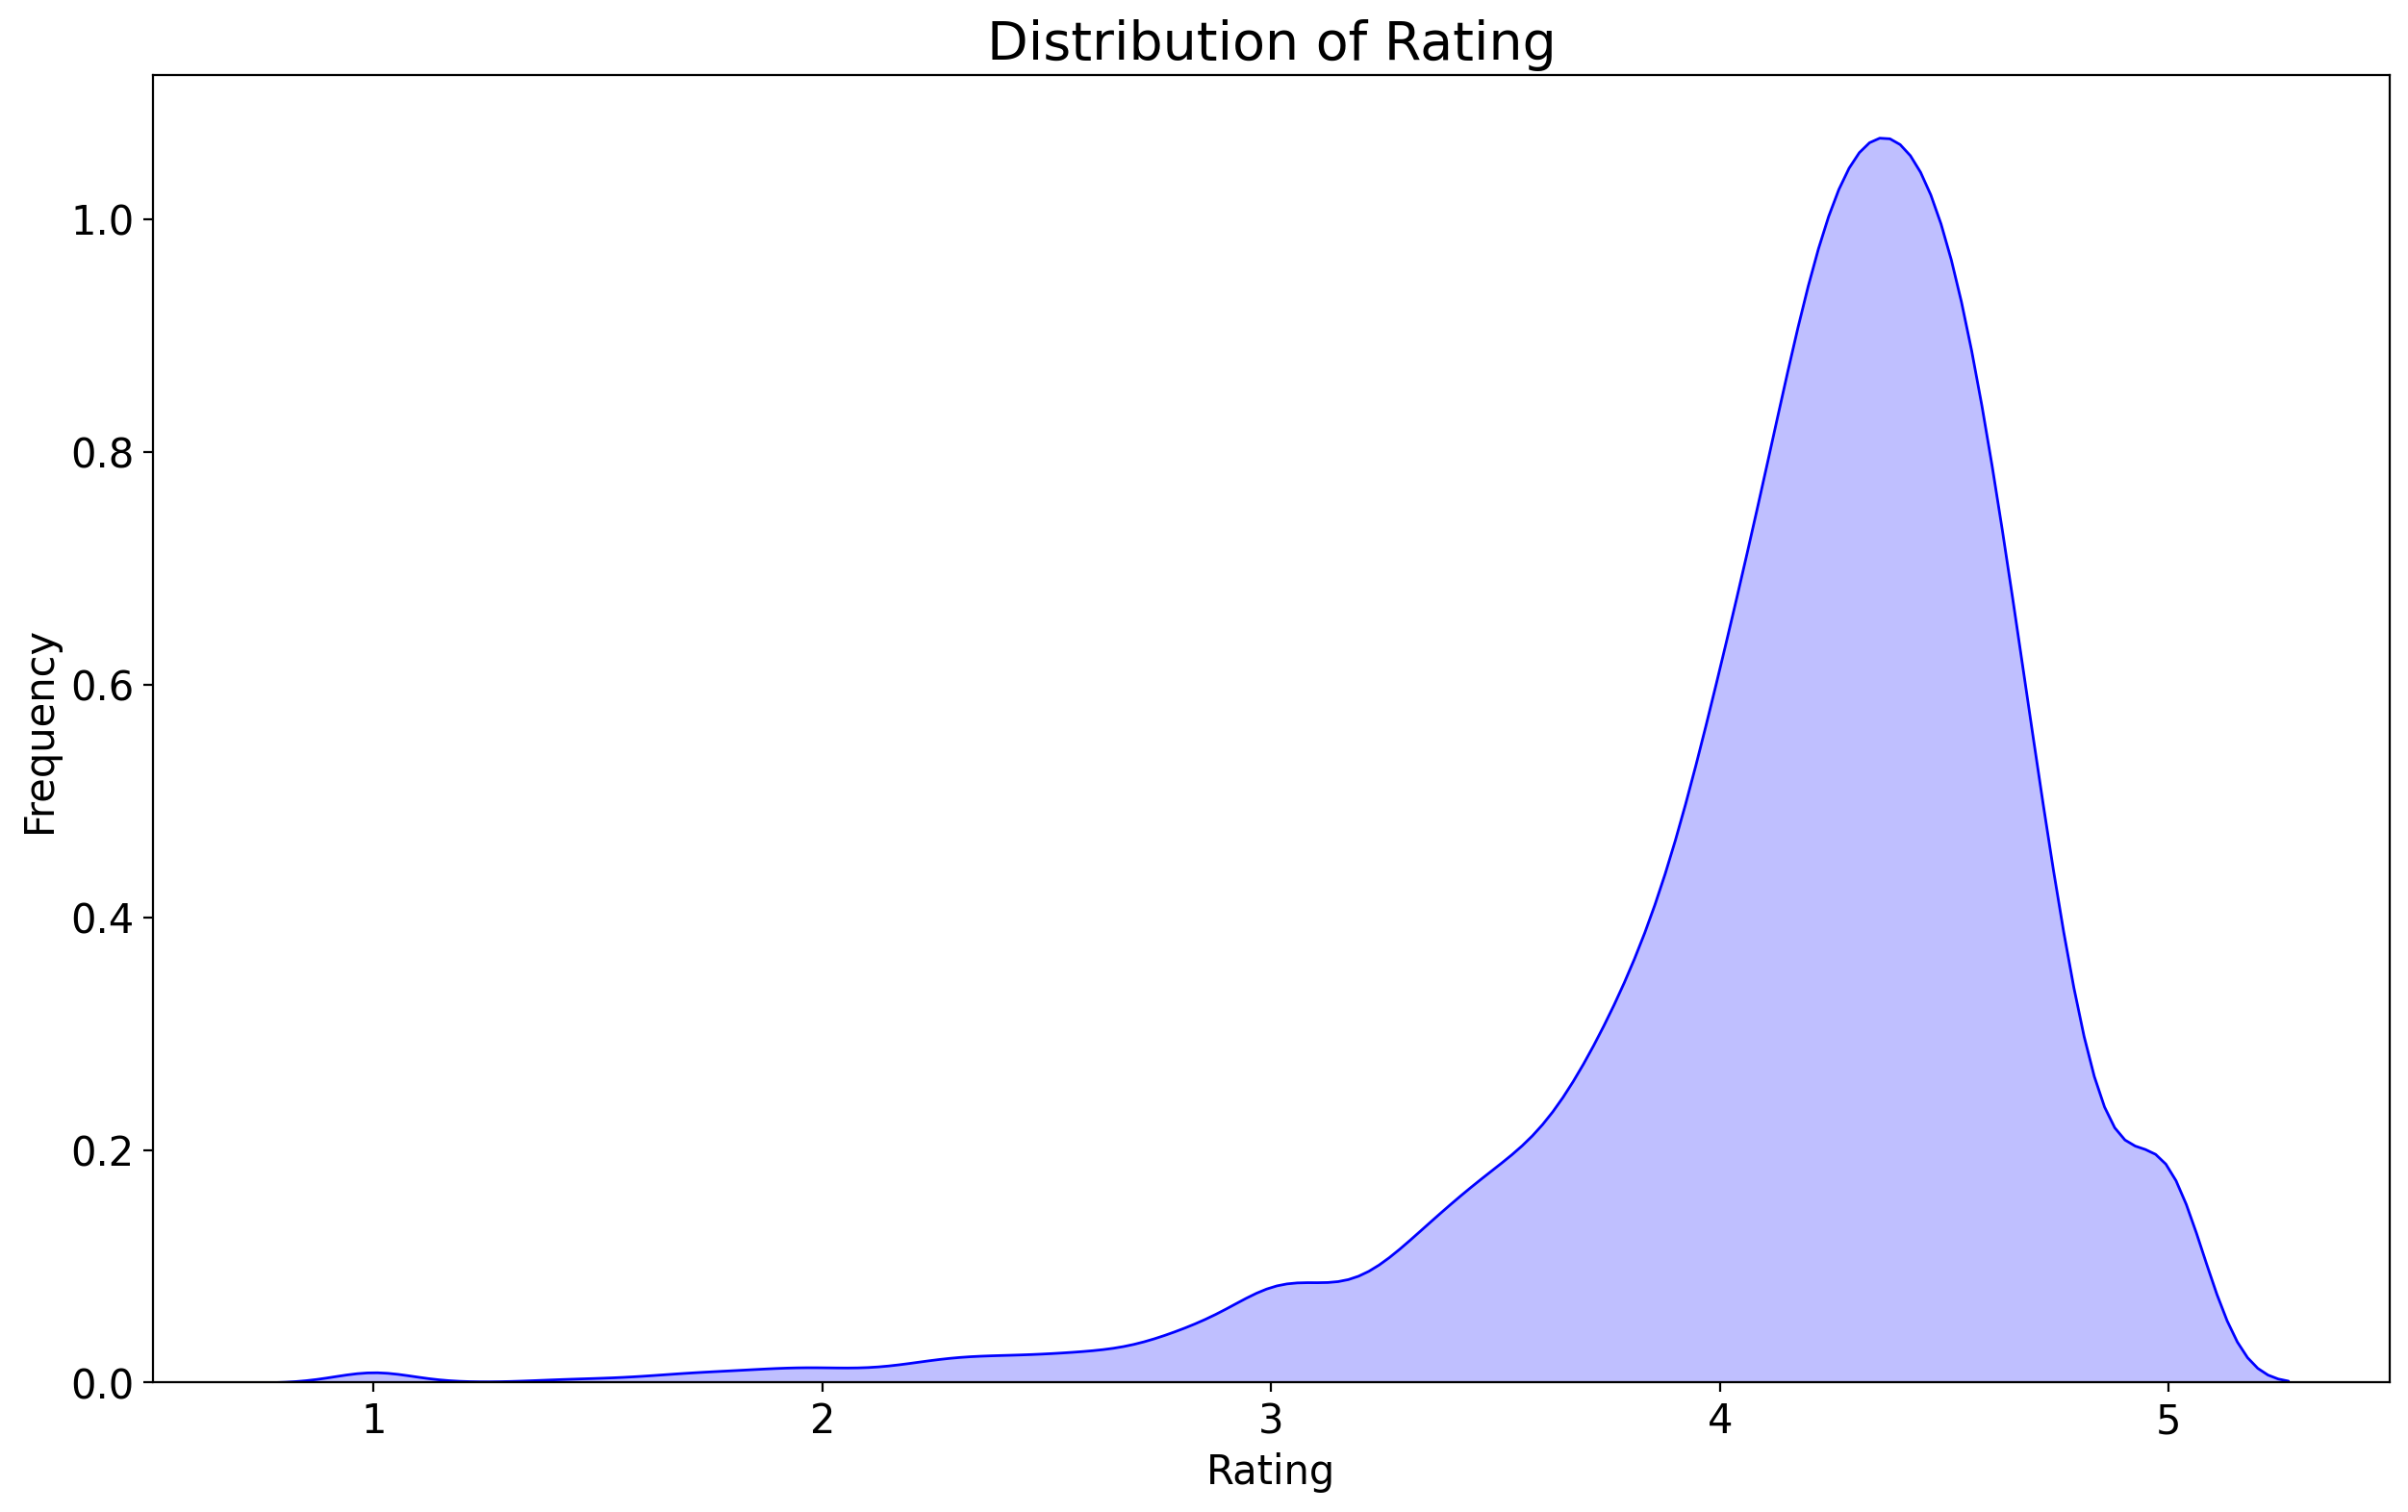

In [17]:

plt.figure(figsize=(15,9), dpi=200)
plt.ylabel("Frequency")
plt.title('Distribution of Rating',size = 20);
sns.kdeplot(df.Rating, shade=True, color='Blue')
print("Mean Rating = ",df.Rating.mean()) #printing the numerical mean of rating

- **Inference:**
    - From the above plot and the numerical mean itself we see that the mean rating is around 4.1 which is obviously in favor of app developers.

## Relationship between Ratings and Reviews

<AxesSubplot:title={'center':'Rating vs Reviews'}, xlabel='Rating', ylabel='Reviews'>

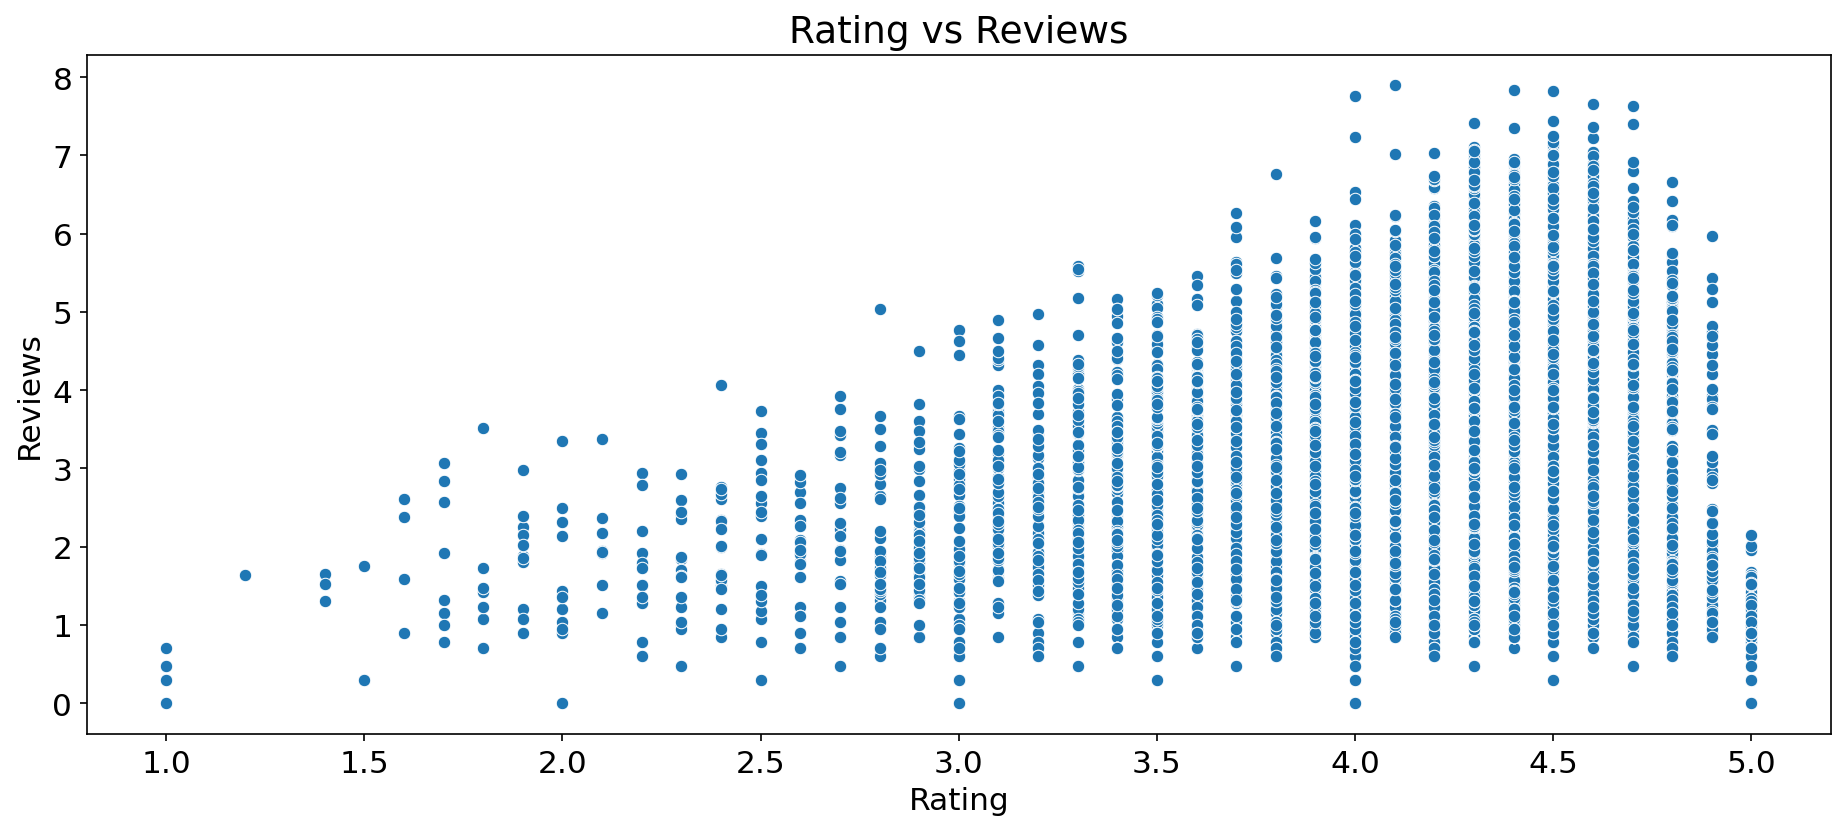

In [18]:
reviewsLog = df.Reviews.copy() 
reviewsLog.loc[ reviewsLog <= 0,]=1# to avoid divide by 0 in log10()
reviewsLog = np.log10( reviewsLog)
plt.figure(figsize=(15,6), dpi=150)
plt.title('Rating vs Reviews')
sns.scatterplot(y=reviewsLog, x=df.Rating)


- **Inference:**
  - Thus we can see that the more rating an app has more the reviews.

## Apps with most user reviews on Playstore

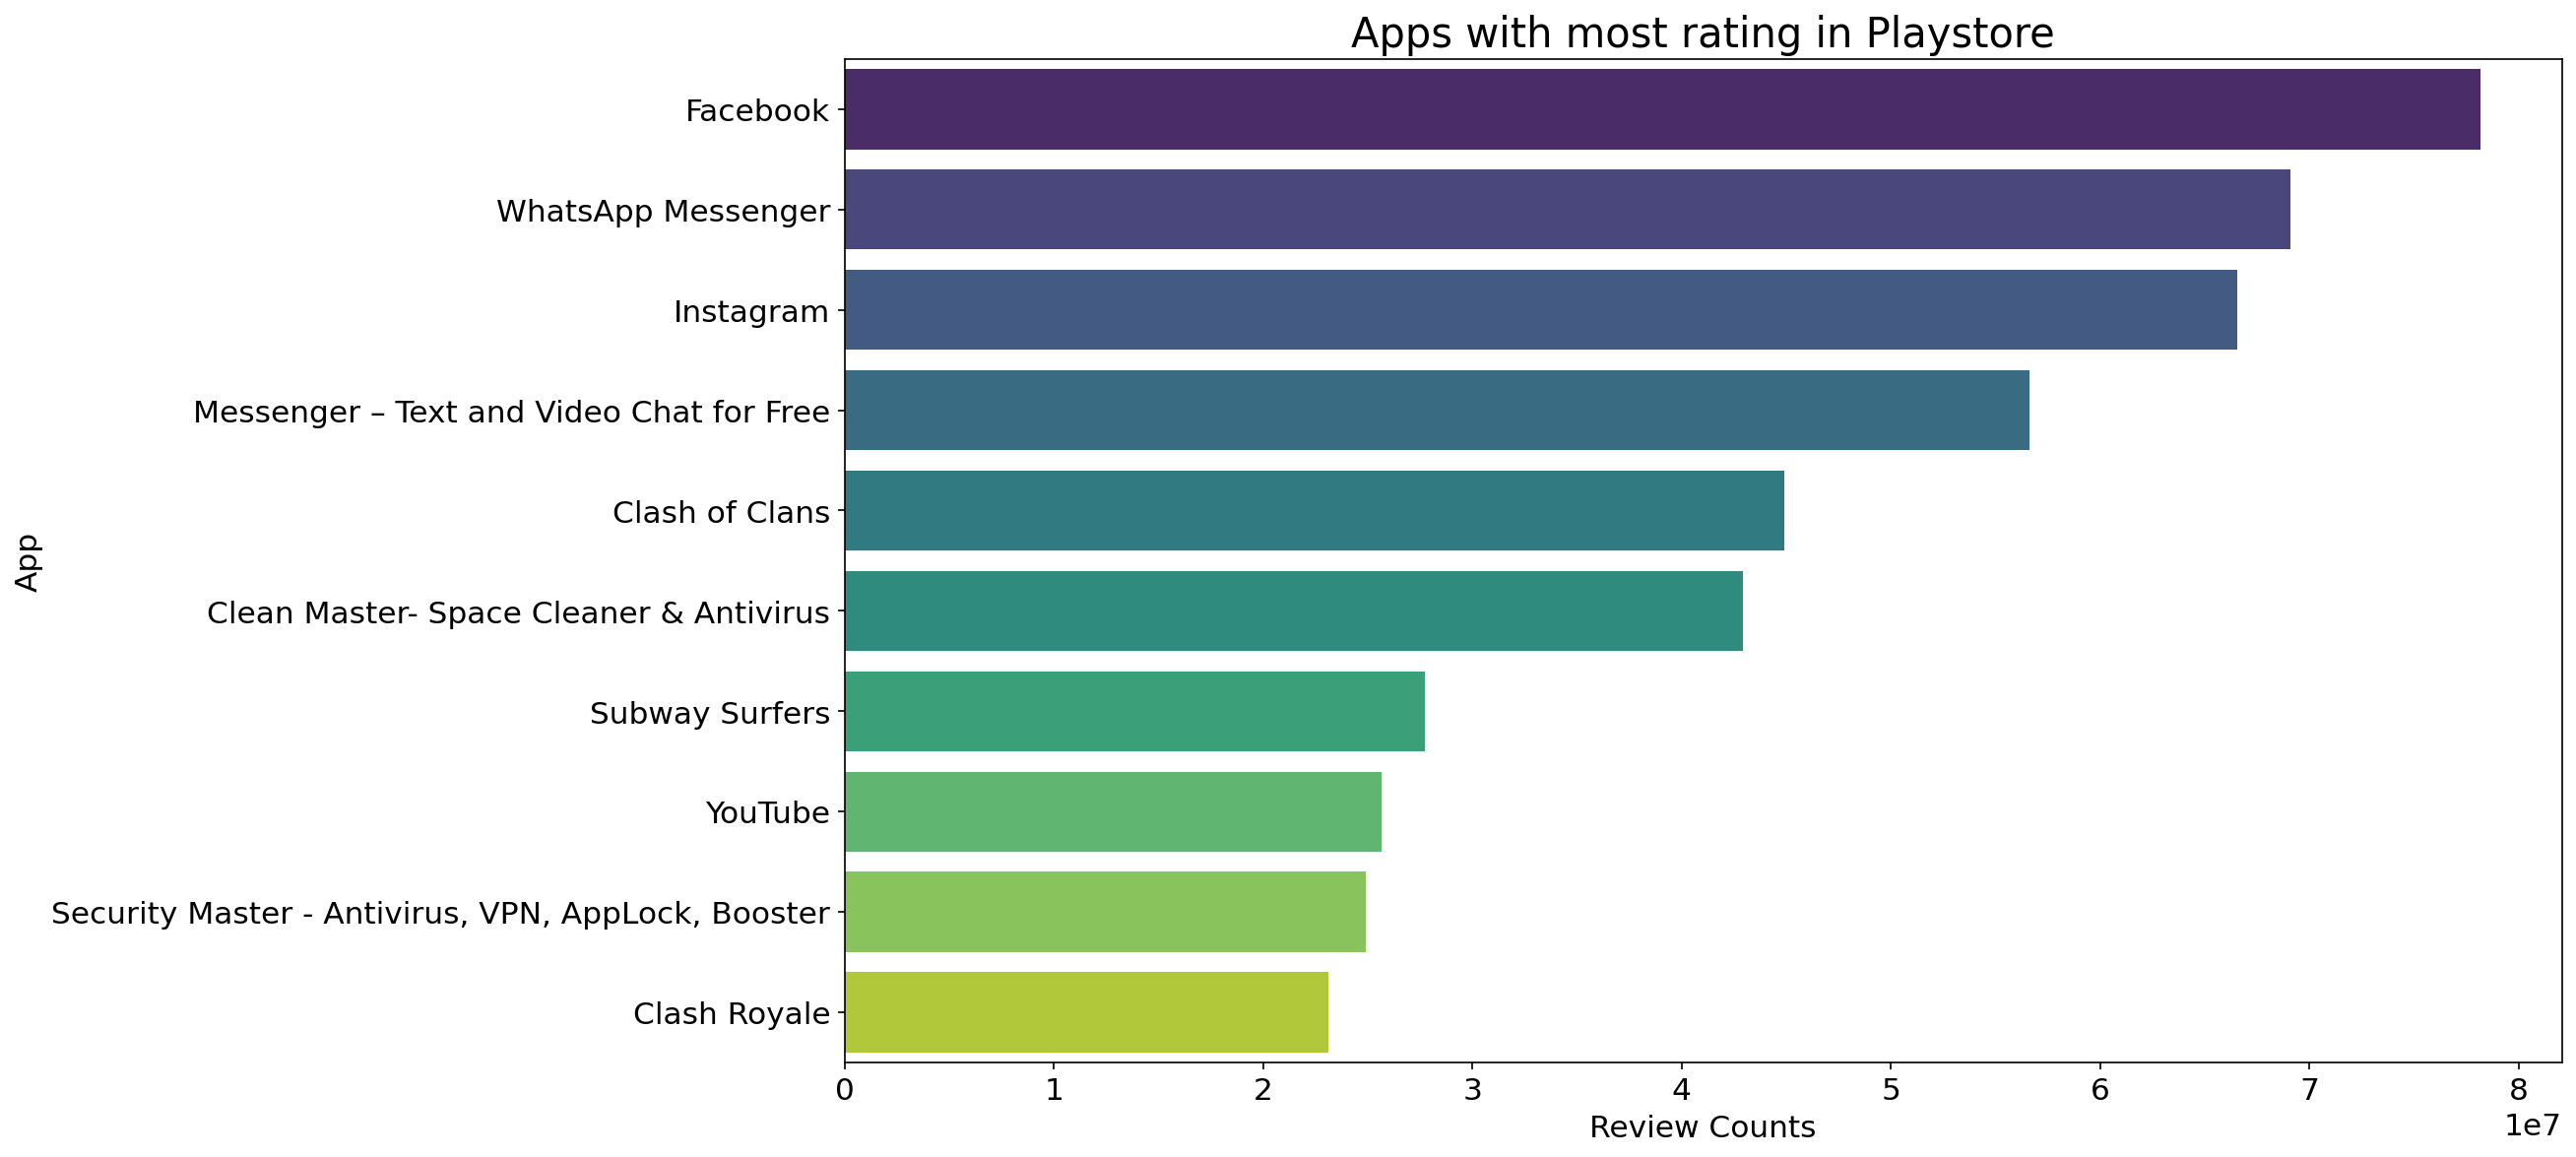

In [19]:
most_reviews = df.sort_values(by='Reviews', ascending=False).head(10)
plt.figure(figsize=(15,9), dpi=150)
sns.barplot( x='Reviews', y='App', data= most_reviews, palette='viridis')
plt.xlabel("Review Counts")
plt.title('Apps with most rating in Playstore',size = 20);

- **Inference:**
    - Thus most reviews are found on communication apps Facebook, Whatsapp, Instagram and Messenger. It would be queer to find out if this has direct relation with this apps being coming pre-installed on the android mobiles.

# Conclusion

Here we have but touched the surface of the deep ocean of visualization of playstore data. The exploration can be done more extensively in unlimited way imaginable and the diving deep into this ocean never ends. To quench the apprehensive minds we can visualize the relation between - App updates vs user reviews, Android supported vs App installs, ratings of free apps vs ratings of paid apps, etc. 